# Latent Dirichlet Allocation - After the First Book Ban 
## Banned Books Amazon.com Reviews (July 1, 2021 to October 12, 2022)

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

from gensim import corpora, models
from gensim.models import Phrases
from gensim.models import CoherenceModel, LdaMulticore
from gensim.models.ldamodel import LdaModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from collections import Counter

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models
from nltk.corpus import stopwords
from gensim.test.utils import datapath
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

/Users/b/miniforge3/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/b/miniforge3/lib/python3.10/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/Users/b/miniforge3/lib/python3.10/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/Users/b/miniforge3/lib/python3.10/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimi

In [2]:
after_ban_df = pd.read_pickle("after_ban_data.pkl")

In [3]:
len(after_ban_df)

24780

In [4]:
documents = after_ban_df['pre_process'].to_list()

## Remove Custom Stop Words

In [5]:
stoplist = [
            'the', 'a', 'an', 'of', 'and', 'or', 'in', 'for', 'to', 'at', 'by', 'from', 'with', 'on', 'as', 'but', 'is', 'are', 'was', 'were', 'be', 'been', 'am', 'i', 'me', 'my', 'we', 'our', 'you', 'fish', 'ha', 'bye', 'okay', 'andy', 'wa', 'nt',
            "a","able","about","above","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","after","afterwards","again","against","ah","all","almost","alone","along","already","also","although","always","am","among","amongst","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent","arise","around","as","aside","ask","asking","at","auth","available","away","awfully","b","back","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","between","beyond","biol","both","brief","briefly","but","by","c","ca","came","can","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","could","couldnt","d","date","did","didn't","different","do","does","doesn't","doing","done","don't","down","downwards","due","during","e","each","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","et-al","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","few","ff","fifth","first","five","fix","followed","following","follows","for","former","formerly","forth","found","four","from","further","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","had","happens","hardly","has","hasn't","have","haven't","having","he","hed","hence","her","here","hereafter","hereby","herein","heres","hereupon","hers","herself","hes","hi","hid","him","himself","his","hither","home","how","howbeit","however","hundred","i","id","ie","if","i'll","im","immediate","immediately","importance","important","in","inc","indeed","index","information","instead","into","invention","inward","is","isn't","it","itd","it'll","its","itself","i've","j","just","k","keep",	"keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","m","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","more","moreover","most","mostly","mr","mrs","much","mug","must","my","myself","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","now","nowhere","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","omitted","on","once","one","ones","only","onto","or","ord","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","owing","own","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","s","said","same","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","she","shed","she'll","shes","should","shouldn't","show","showed","shown","showns","shows","significant","significantly",
            "similar","similarly","since","six","slightly","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure",	"t","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","these","they","theyd","they'll","theyre","they've","think","this","those","thou","though","thoughh","thousand","throug","through","throughout","thru","thus","til","tip","to","together","too","took","toward","towards","chapter", 'condition', 'la',"tried","tries","truly","try","trying","ts","twice","two","u","un","under","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","very","via","viz","vol","vols","vs","w","want","wants","was","wasnt","way","we","wed","welcome","we'll","went","were","werent","we've","what","whatever","what'll","whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","who'll","whom","whomever","whos","whose","why","widely","willing","wish","with","within","without","wont","words","world","would","wouldnt","www","x","y","yes","yet","you","youd","you'll","your","youre","yours","yourself","yourselves","you've","z","zero", "wa", "nt", "ha", "purchased", "ordered", "amazon", "damaged", 
            "book","read","character","story","will","school","student", "people", "parent", "child", "weekend", "people", "person", "well", "doe", "feel", "felt", "cover", "arrived", "described", "addie",
            "não", "write", "writing", "episode", "website", "robin", "kosawa", "emily", "judy", "buch", "gline", "griffin", "patrick", "feyre", "nesta", "de", "purchase",
            "cliff", "carter", "novel", "caroline", "ii", "molly", "aside", "arthur", "academy", "cad", "season", "jennifer", "simon", 'lot', 'ya', "atwood", 'author',
            "reader", "buy", "copy", "morrison", "story", "storytelling", "reading", "series", "absolutely", "definitely", "go", "going", "bought", "written", "review",          
            "book","read","character","story","will", "weekend", "find", "main", "people", "person", "well", "felt", "feel", "scene",
            "não", "write", "writing", "episode", "website", "robin", "kosawa", "emily", "judy", "buch", "gline", "griffin", "patrick", "baz", "lerue", "henry", 
            "cliff", "carter", "novel", "caroline", "ii", "molly", "aside", "arthur", "academy", "cad", "season", "jennifer", "atwood", 'author', "things", "thing", "thought", "wanted", "bit",
            "reader", "buy", "copy", "morrison", "story", "storytelling", "reading", "series", "plot", "audiobook", "narrator", "topic", "addie"
           ]

# Bring in ALA dataset 
banned_df = pd.read_csv('../data/pen_dataset.csv')

# Remove duplicate books for web scraper
banned_df = banned_df.drop_duplicates(subset=['amazon_url'])

# Drop lines where author is duplicated
banned_df = banned_df.drop_duplicates(subset=['Author'])

# Remove books without Amazon reviews
banned_df = banned_df.dropna(subset=['amazon_url'])

# Create list of authors to add to stop words
author_list = [val.strip() for sublist in banned_df.Author.dropna().str.split(",").tolist() for val in sublist]
author_list = list(set(author_list))
author_list = author_list[1:]
author_list = [i.lower() for i in author_list]

# Add author names to domain specific stop words
stoplist.extend(author_list)

# Add standard English stopwords
stop = stopwords.words('english')
stoplist.extend(stop)

In [6]:
# remove common words and tokenize
texts = [[word for word in document.split() if word not in stoplist]
         for document in documents]

## Tokenize

In [7]:
# remove words that appear only once
frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 5]
         for text in texts]

## N-Grams

In [8]:
# Add bigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(texts, min_count=20)

for idx in range(len(texts)):
    for token in bigram[texts[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            texts[idx].append(token)

## Create Dictionary and Corpus

In [9]:
# Create the dictionary
dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than X documents.
dictionary.filter_extremes(no_below=50, no_above=0.5)

# Create the corpus.  This is a Term Frequency / Bag of Words appraoch.
corpus = [dictionary.doc2bow(text) for text in texts]

print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 1749
Number of documents: 24780


## Add Debug Capabilities

In [10]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)

## Set Parameters for Base LDA Model (With Tuning)

In [11]:
NUM_TOPICS = 10
chunksize = 2000
passes = 8
iterations = 120
eval_every = 1
temp = dictionary[0]
id2word = dictionary.id2token
rand_state = 42

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every,
    random_state=rand_state
)

## Compute Coherence Scores to Pick the Best Number of Topics

In [12]:
%%time

def compute_coherence_values(dictionary, corpus, texts, cohere, limit, start=2, step=2):

    coherence_values = []

    for num_topics in range(start, limit, step):
        
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha='auto',
                         eta='auto',
                         iterations=iterations,
                         passes=passes,
                         random_state=rand_state,)
        
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [13]:
limit=50
start=2
step=2

In [14]:
%%time

coherence_values = compute_coherence_values(dictionary=dictionary, 
                                            corpus=corpus, 
                                            texts=texts, 
                                            cohere='c_v', 
                                            start=start, 
                                            limit=limit, 
                                            step=step)

In [15]:
plt.figure(figsize=(8,5))

# Create a custom x-axis
x = range(start, limit, step)

# Build the line plot
ax = sns.lineplot(x=x, y=coherence_values, color='#238C8C')

# Set titles and labels
plt.title("Best Number of Topics for LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xlim(start, limit)
plt.xticks(range(2, limit, step))

# Add a vertical line to show the optimum number of topics
plt.axvline(x[np.argmax(coherence_values)], 
            color='#F26457', linestyle='--')

# Draw a custom legend
legend_elements = [Line2D([0], [0], color='#238C8C', 
                          ls='-', label='Coherence Value (c_v)'),
                   Line2D([0], [1], color='#F26457', 
                          ls='--', label='Optimal Number of Topics')]

ax.legend(handles=legend_elements, loc='upper right')

## Run Trained and Tuned Model

In [16]:
temp = dictionary[0]
id2word = dictionary.id2token

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=2000,
    alpha='auto',
    eta='auto',
    iterations=120,
    num_topics=6,
    passes=8,
    eval_every=None
)

## Visualize the Results

In [17]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=True)

pyLDAvis.display(lda_viz)

/Users/b/miniforge3/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/b/miniforge3/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/b/miniforge3/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/b/miniforge3/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's document

In [18]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"content" + 0.028*"classic" + 0.026*"tale" + 0.025*"money" + '
  '0.024*"time" + 0.022*"view" + 0.021*"interesting" + 0.018*"point" + '
  '0.016*"missing" + 0.016*"waste"'),
 (1,
  '0.046*"beautiful" + 0.040*"life" + 0.017*"beautifully" + 0.016*"powerful" + '
  '0.015*"family" + 0.015*"heart" + 0.014*"experience" + 0.014*"message" + '
  '0.011*"word" + 0.011*"illustration"'),
 (2,
  '0.033*"kid" + 0.027*"young" + 0.026*"girl" + 0.024*"family" + 0.020*"age" + '
  '0.018*"year" + 0.018*"adult" + 0.015*"boy" + 0.013*"teen" + 0.011*"life"'),
 (3,
  '0.046*"caste" + 0.024*"system" + 0.024*"american" + 0.022*"racism" + '
  '0.021*"black" + 0.021*"history" + 0.019*"america" + 0.017*"race" + '
  '0.016*"caste_system" + 0.014*"country"'),
 (4,
  '0.071*"great" + 0.054*"good" + 0.044*"loved" + 0.029*"amazing" + '
  '0.025*"recommend" + 0.017*"enjoyed" + 0.016*"time" + 0.015*"favorite" + '
  '0.014*"best" + 0.012*"perfect"'),
 (5,
  '0.024*"time" + 0.008*"long" + 0.008*"star" + 0.00

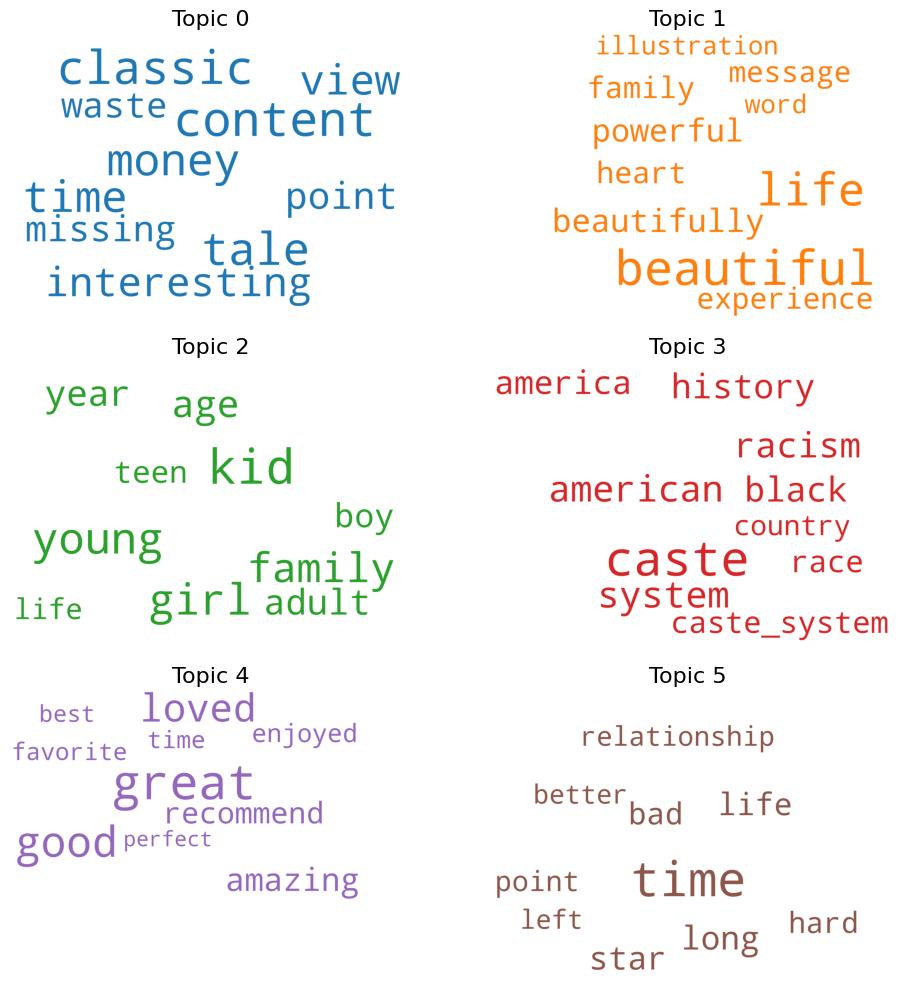

In [19]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stoplist,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/var/folders/9d/lk0b41ms5_vg96dq4zqm3t5m0000gp/T/ipykernel_1867/3728866964.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/9d/lk0b41ms5_vg96dq4zqm3t5m0000gp/T/ipykernel_1867/3728866964.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/9d/lk0b41ms5_vg96dq4zqm3t5m0000gp/T/ipykernel_1867/3728866964.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/9d/lk0b41ms5_vg96dq4zqm3t5m0000gp/T/ipykernel_1867/3728866964.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignmen

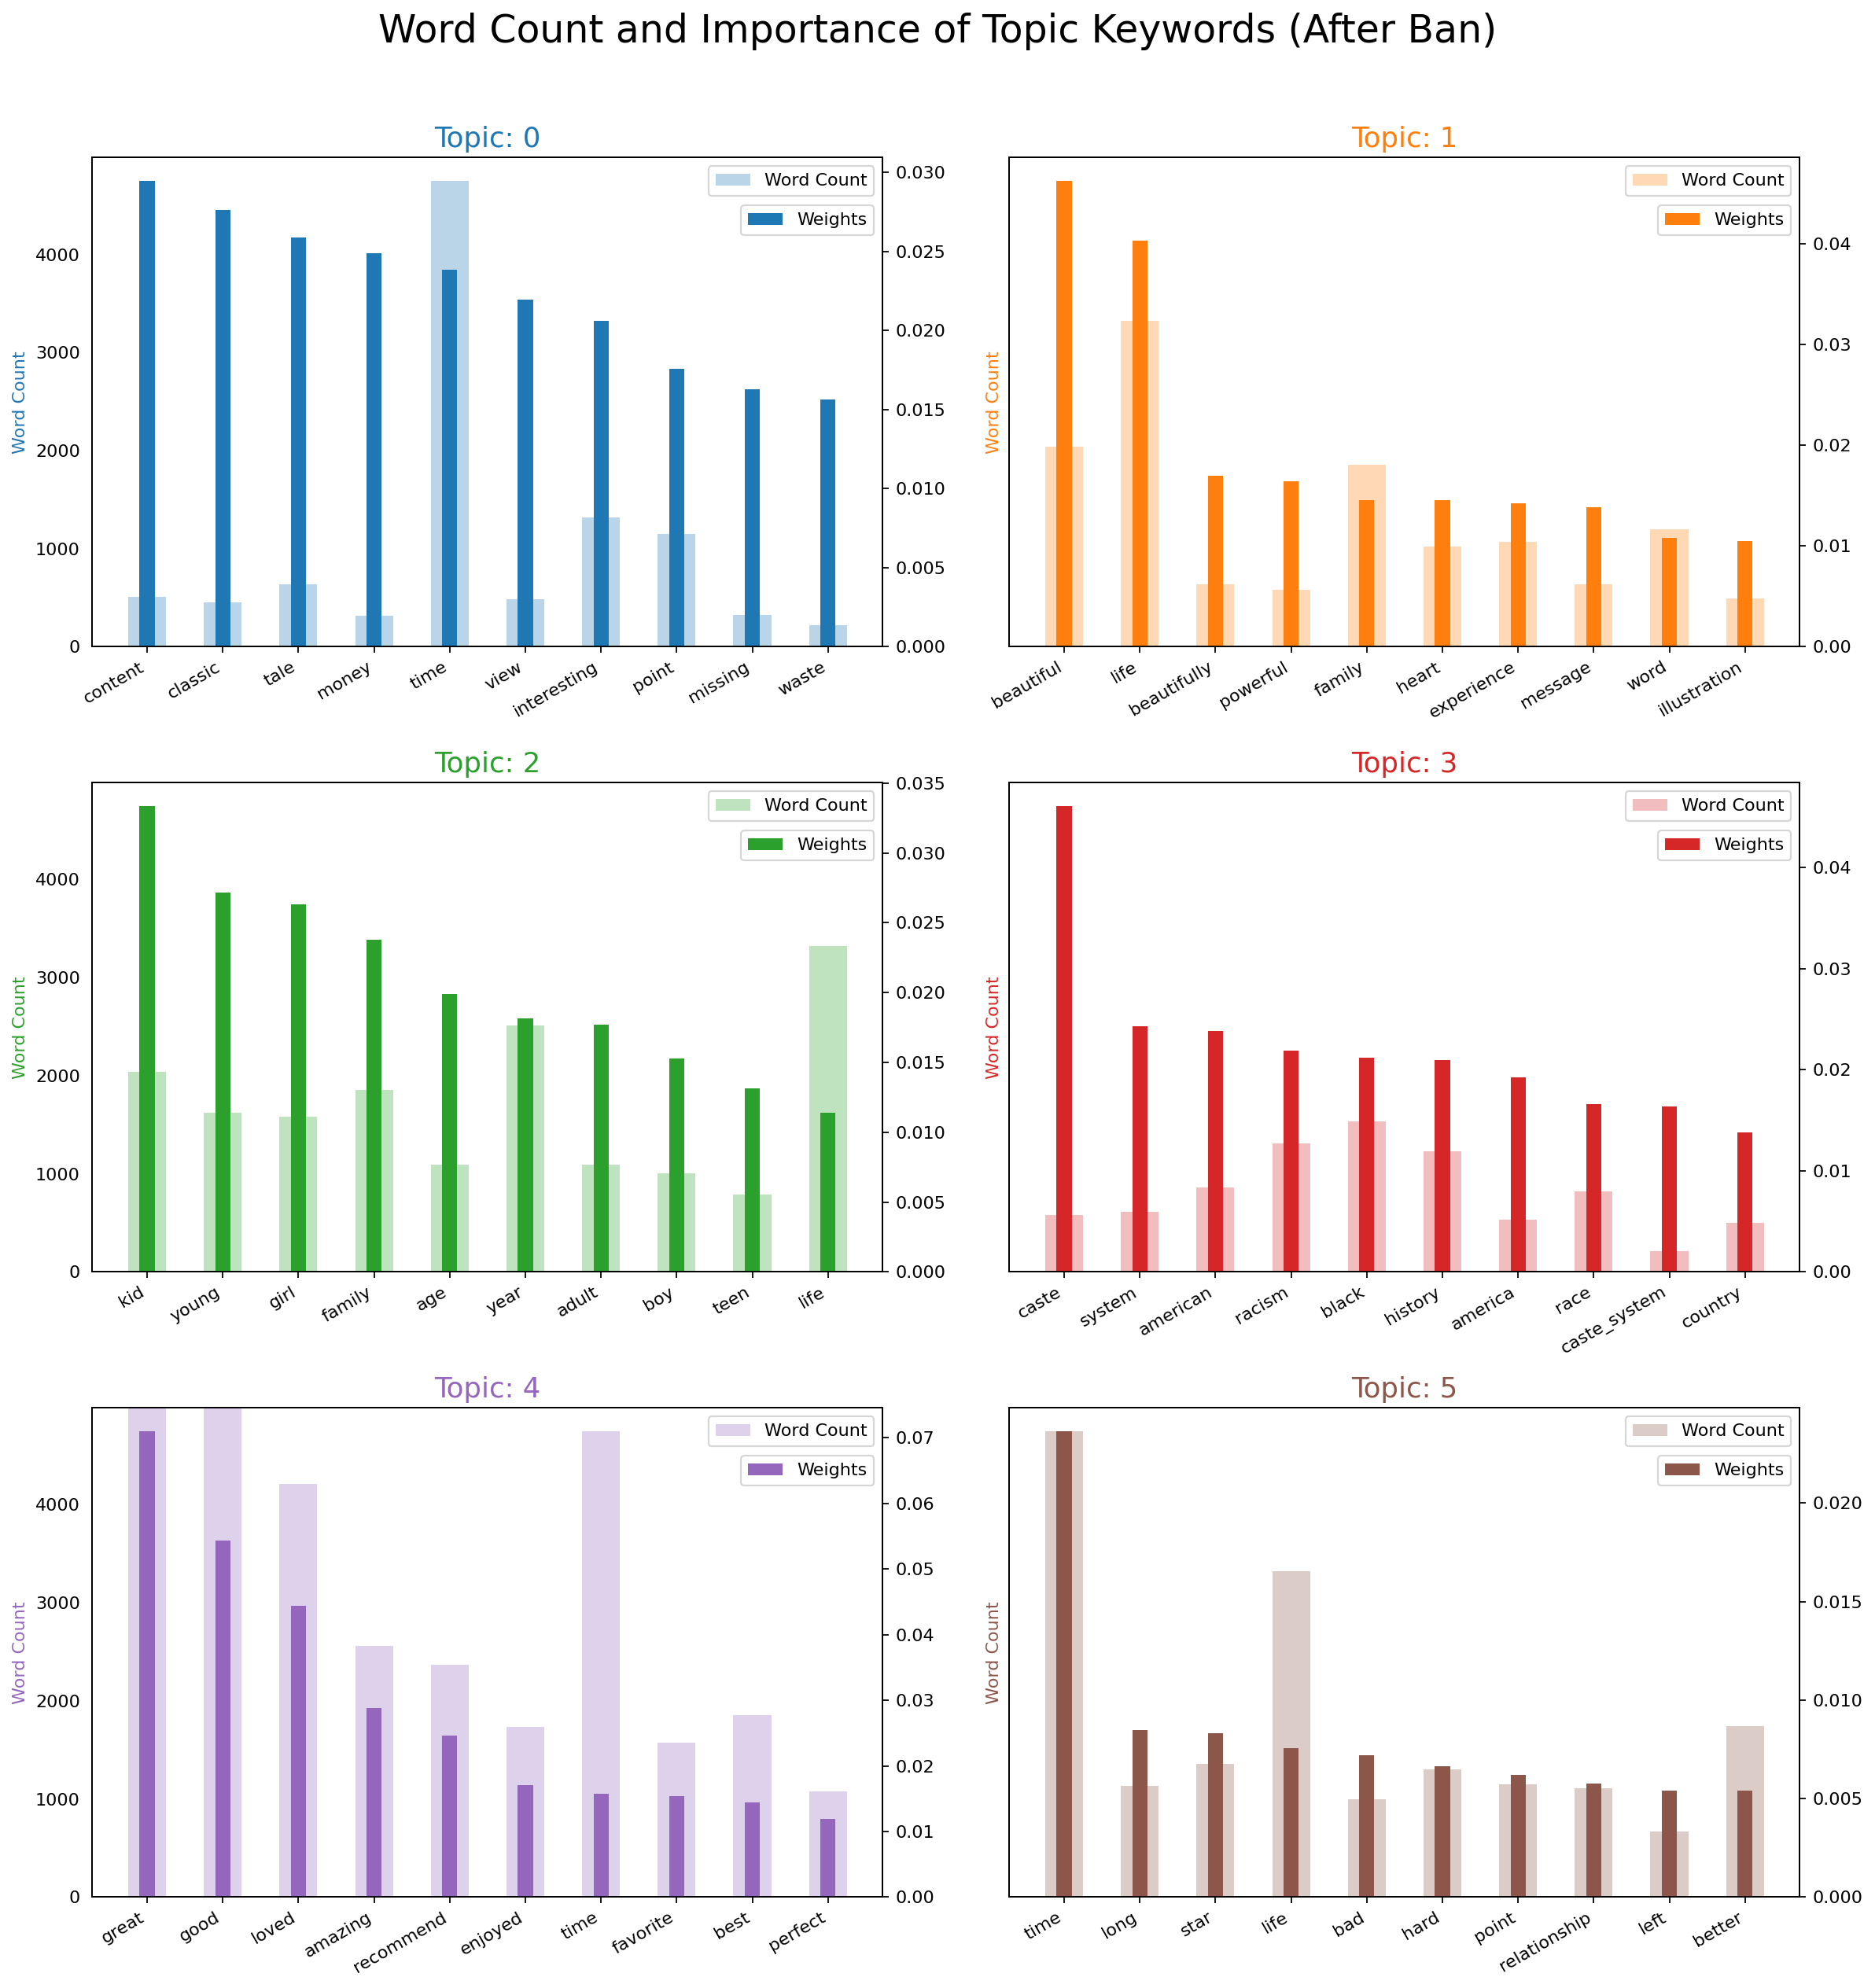

In [20]:
topics = lda_model.show_topics(formatted=False)

data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(15,15), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, None); ax.set_ylim(0, None)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper right'); ax_twin.legend(bbox_to_anchor=(1.0, .92))

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords (After Ban)', fontsize=22, y=1.05)    
plt.show()

In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 


Perplexity:  -6.885689874310844


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ',  coherence_lda)

In [24]:
# lda_model.save("final_after_book_ban_lda.model")